# Amazon Sales Analysis

### Importing Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Data Retrieving

In [4]:
df=pd.read_csv('Amazon Sales data.csv')

In [5]:
df

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,5/2/2014,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/2013,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Sub-Saharan Africa,Mali,Clothes,Online,M,7/26/2011,512878119,9/3/2011,888,109.28,35.84,97040.64,31825.92,65214.72
96,Asia,Malaysia,Fruits,Offline,L,11/11/2011,810711038,12/28/2011,6267,9.33,6.92,58471.11,43367.64,15103.47
97,Sub-Saharan Africa,Sierra Leone,Vegetables,Offline,C,6/1/2016,728815257,6/29/2016,1485,154.06,90.93,228779.10,135031.05,93748.05
98,North America,Mexico,Personal Care,Offline,M,7/30/2015,559427106,8/8/2015,5767,81.73,56.67,471336.91,326815.89,144521.02


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          100 non-null    object 
 1   Country         100 non-null    object 
 2   Item Type       100 non-null    object 
 3   Sales Channel   100 non-null    object 
 4   Order Priority  100 non-null    object 
 5   Order Date      100 non-null    object 
 6   Order ID        100 non-null    int64  
 7   Ship Date       100 non-null    object 
 8   Units Sold      100 non-null    int64  
 9   Unit Price      100 non-null    float64
 10  Unit Cost       100 non-null    float64
 11  Total Revenue   100 non-null    float64
 12  Total Cost      100 non-null    float64
 13  Total Profit    100 non-null    float64
dtypes: float64(5), int64(2), object(7)
memory usage: 11.1+ KB


In [7]:
df.isnull().sum()

Region            0
Country           0
Item Type         0
Sales Channel     0
Order Priority    0
Order Date        0
Order ID          0
Ship Date         0
Units Sold        0
Unit Price        0
Unit Cost         0
Total Revenue     0
Total Cost        0
Total Profit      0
dtype: int64

### Data Pre-Processing

In [17]:
categorical_columns = ['Region','Item Type', 'Sales Channel', 'Order Priority']
for col in categorical_columns:
    print(f"{col} unique values:\n{df[col].unique()}\n")

Region unique values:
['Australia and Oceania' 'Central America and the Caribbean' 'Europe'
 'Sub-Saharan Africa' 'Asia' 'Middle East and North Africa'
 'North America']

Item Type unique values:
['Baby Food' 'Cereal' 'Office Supplies' 'Fruits' 'Household' 'Vegetables'
 'Personal Care' 'Clothes' 'Cosmetics' 'Beverages' 'Meat' 'Snacks']

Sales Channel unique values:
['Offline' 'Online']

Order Priority unique values:
['H' 'C' 'L' 'M']



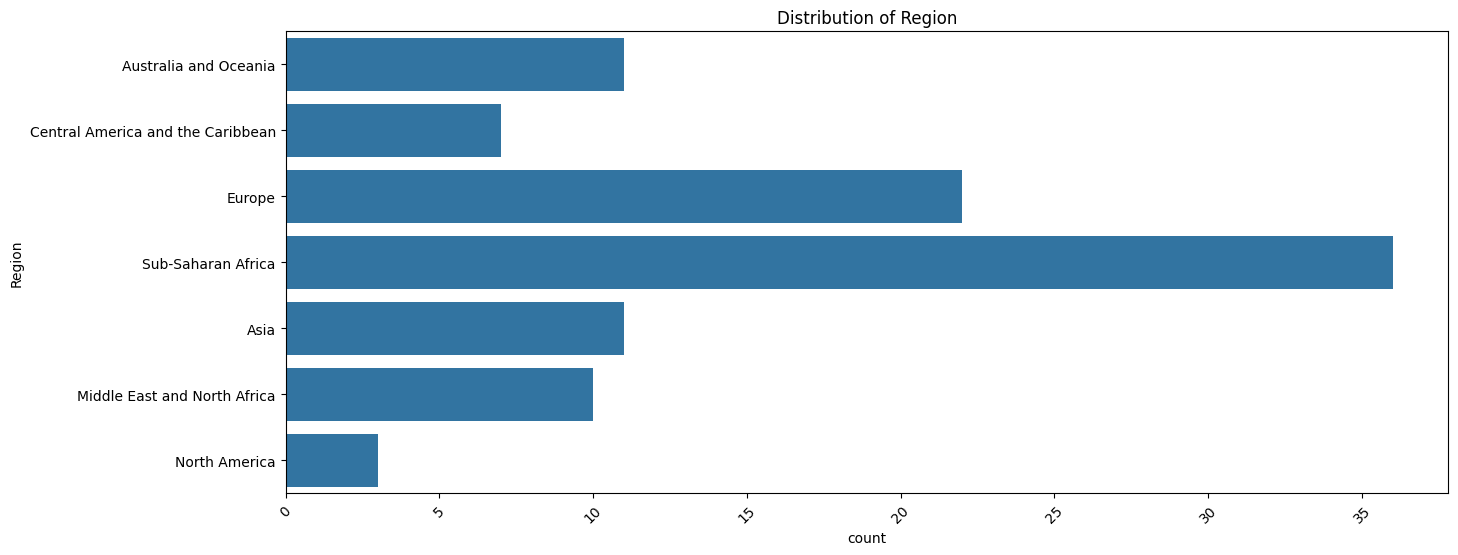

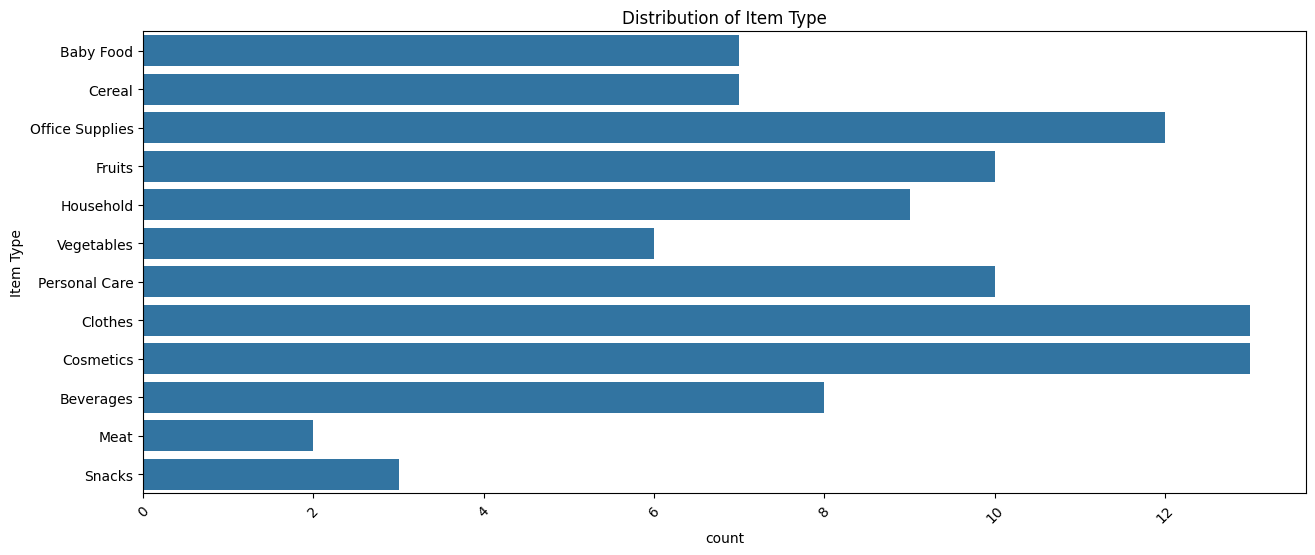

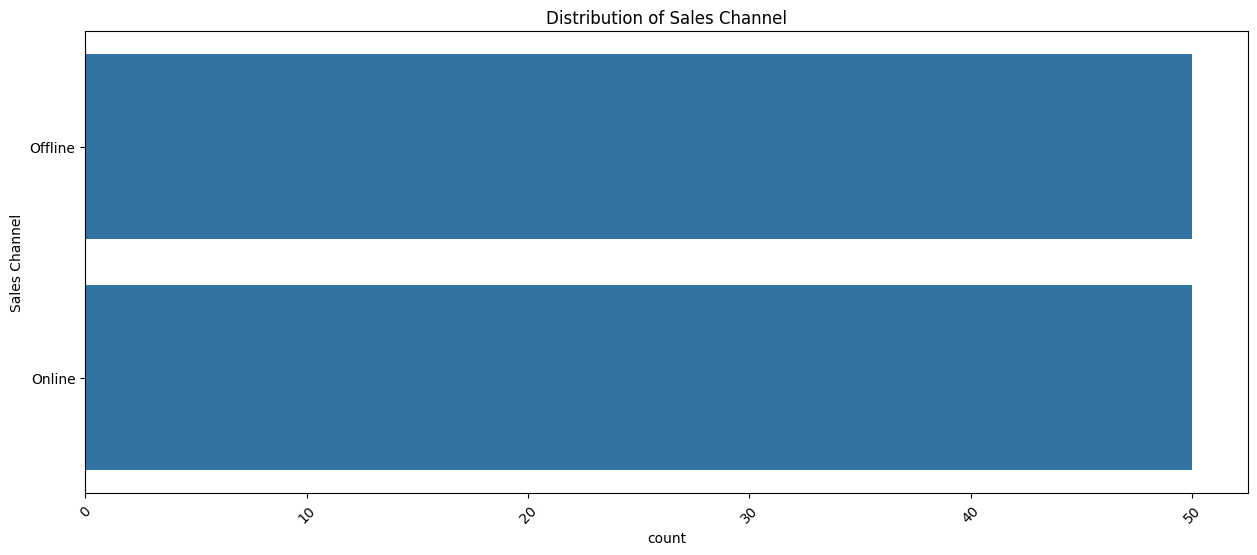

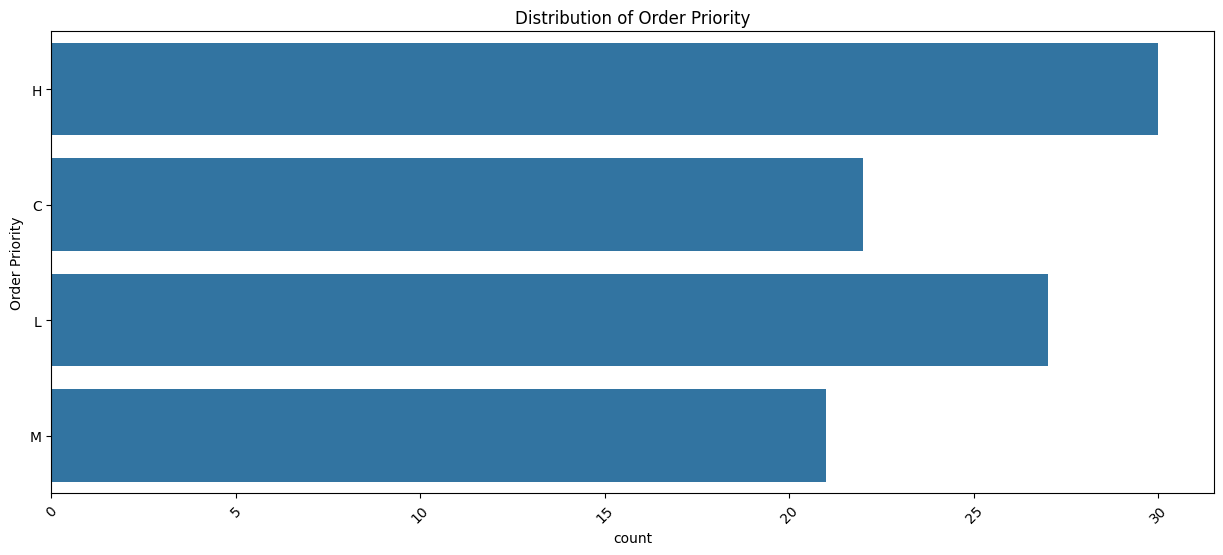

In [18]:
for col in categorical_columns:
    plt.figure(figsize=(15, 6))
    sns.countplot(df[col])
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.show()

### Month Based Sales

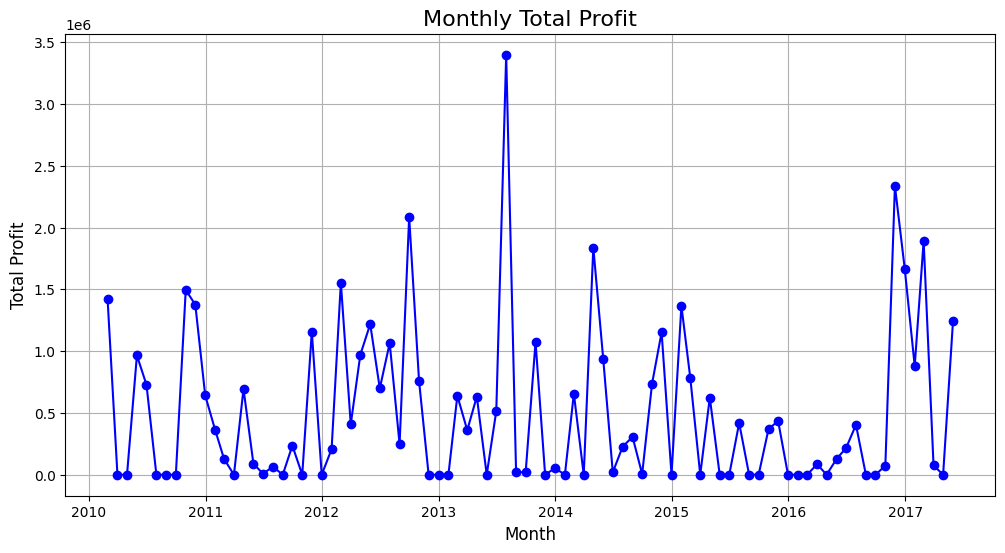

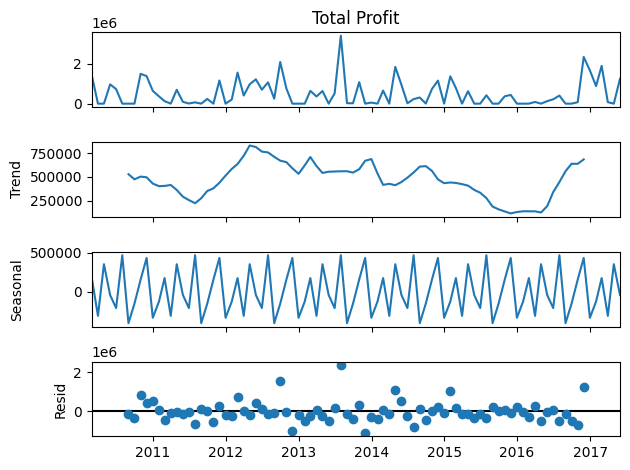

In [19]:
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

if 'Order Date' in df.columns:
    df['Order Date'] = pd.to_datetime(df['Order Date'])
else:
    raise KeyError("Column 'Order Date' not found in the dataset.")

data = df.groupby('Order Date')['Total Profit'].sum().reset_index()

data.set_index('Order Date', inplace=True)
monthly_data = data['Total Profit'].resample('ME').sum()

plt.figure(figsize=(12, 6))
plt.plot(monthly_data, marker='o', linestyle='-', color='blue')
plt.title('Monthly Total Profit', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Profit', fontsize=12)
plt.grid(True)
plt.show()

decompose_result = seasonal_decompose(monthly_data, model='additive', period=12)
decompose_result.plot()
plt.show()

In [20]:
df

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,2010-05-28,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,2012-08-22,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,2014-05-02,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,2014-06-20,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2013-02-01,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Sub-Saharan Africa,Mali,Clothes,Online,M,2011-07-26,512878119,9/3/2011,888,109.28,35.84,97040.64,31825.92,65214.72
96,Asia,Malaysia,Fruits,Offline,L,2011-11-11,810711038,12/28/2011,6267,9.33,6.92,58471.11,43367.64,15103.47
97,Sub-Saharan Africa,Sierra Leone,Vegetables,Offline,C,2016-06-01,728815257,6/29/2016,1485,154.06,90.93,228779.10,135031.05,93748.05
98,North America,Mexico,Personal Care,Offline,M,2015-07-30,559427106,8/8/2015,5767,81.73,56.67,471336.91,326815.89,144521.02


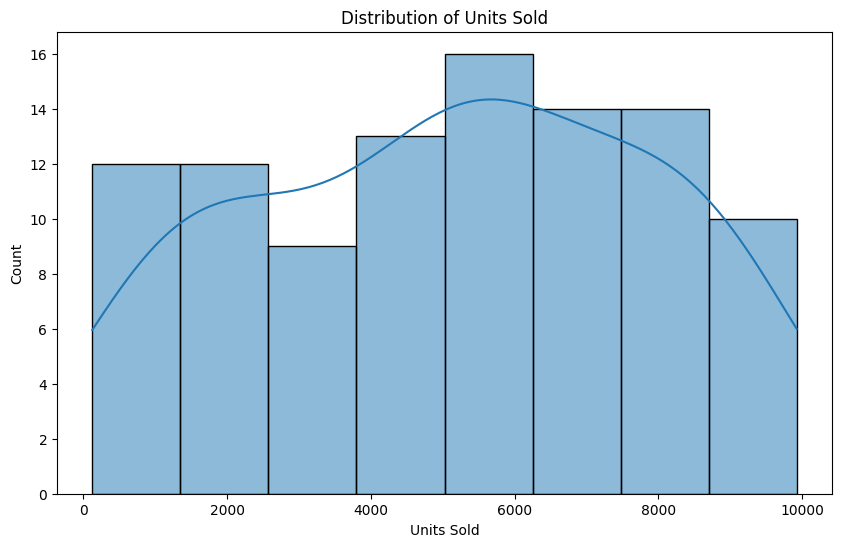

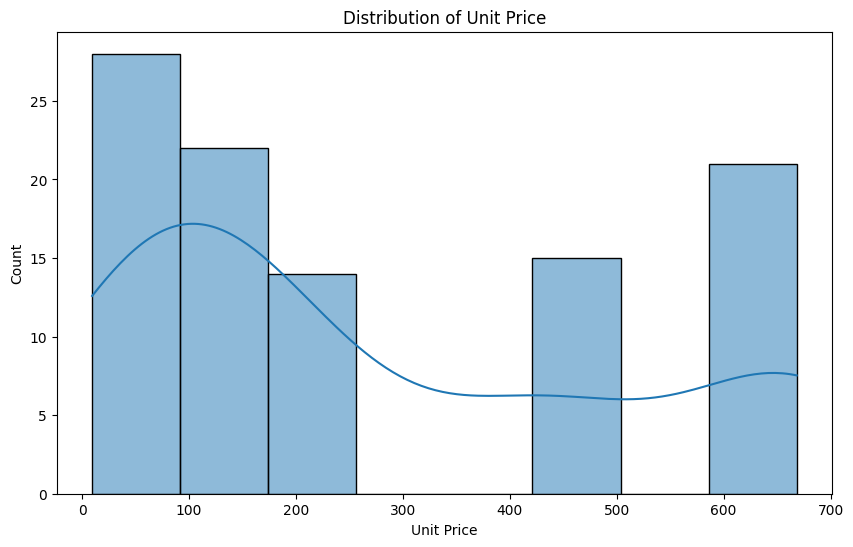

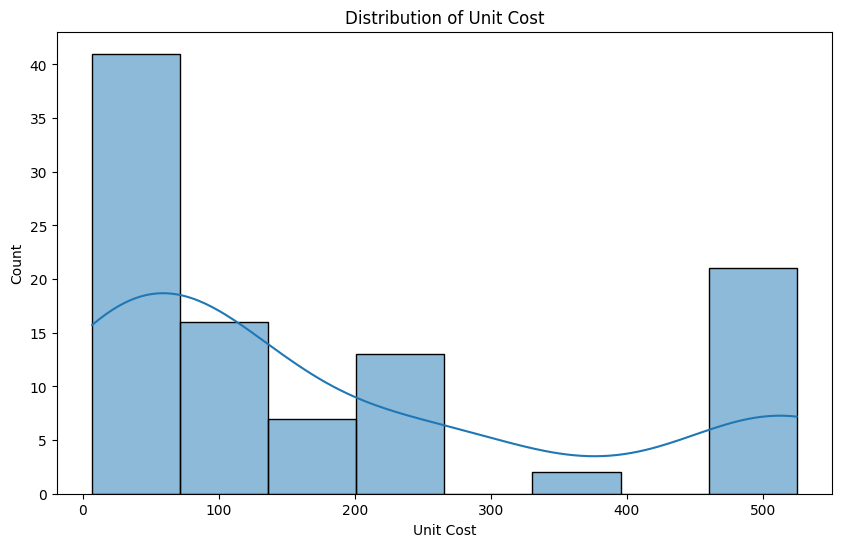

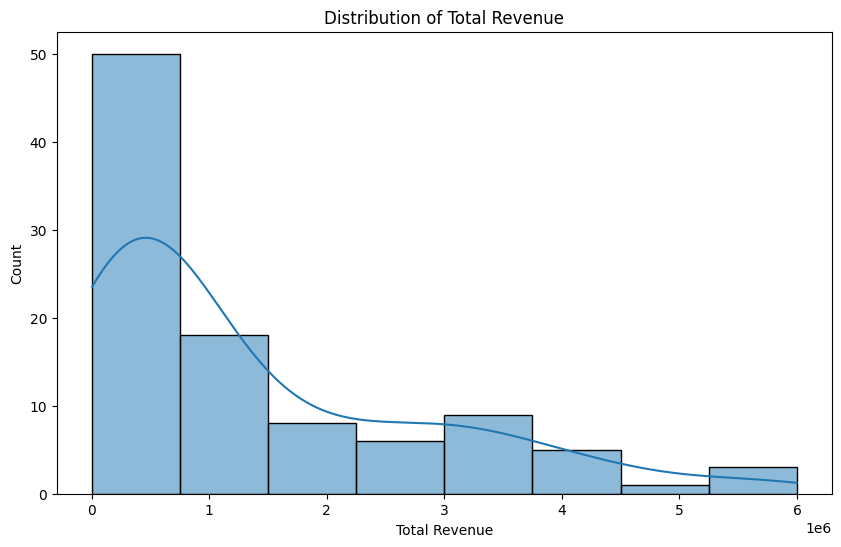

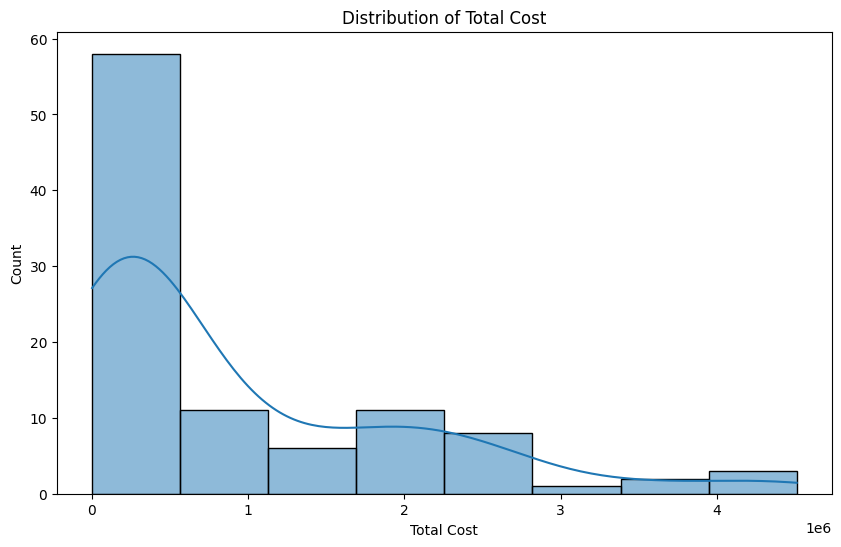

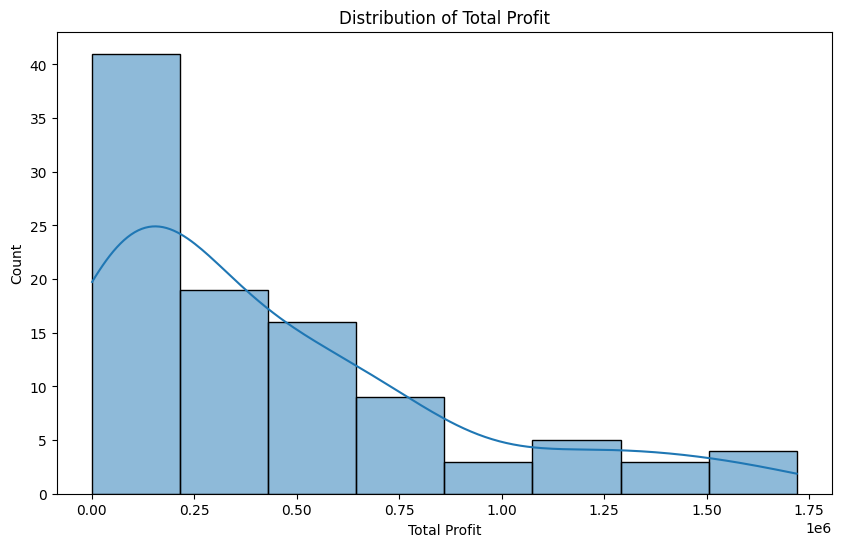

In [21]:
numerical_columns = ['Units Sold', 'Unit Price', 'Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit']
for col in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

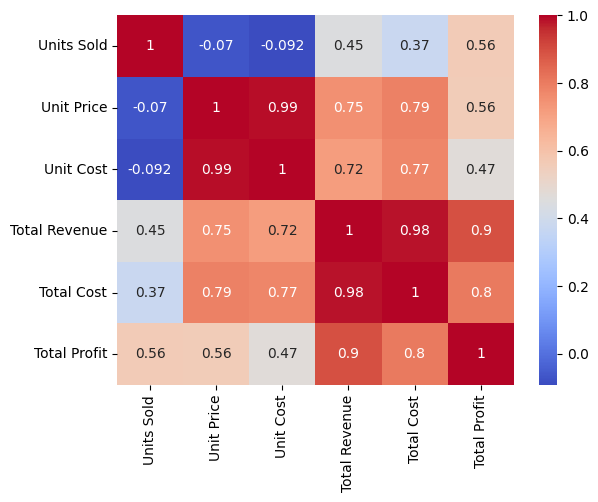

In [22]:
corr = df[['Units Sold', 'Unit Price', 'Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

### Clustering

Cluster Summary:
Cluster  Item Type      
0        Office Supplies    12
         Fruits             10
         Personal Care      10
         Household           9
         Beverages           8
         Baby Food           7
         Cereal              7
         Vegetables          6
         Snacks              3
         Meat                2
1        Clothes            13
2        Cosmetics          13
Name: count, dtype: int64


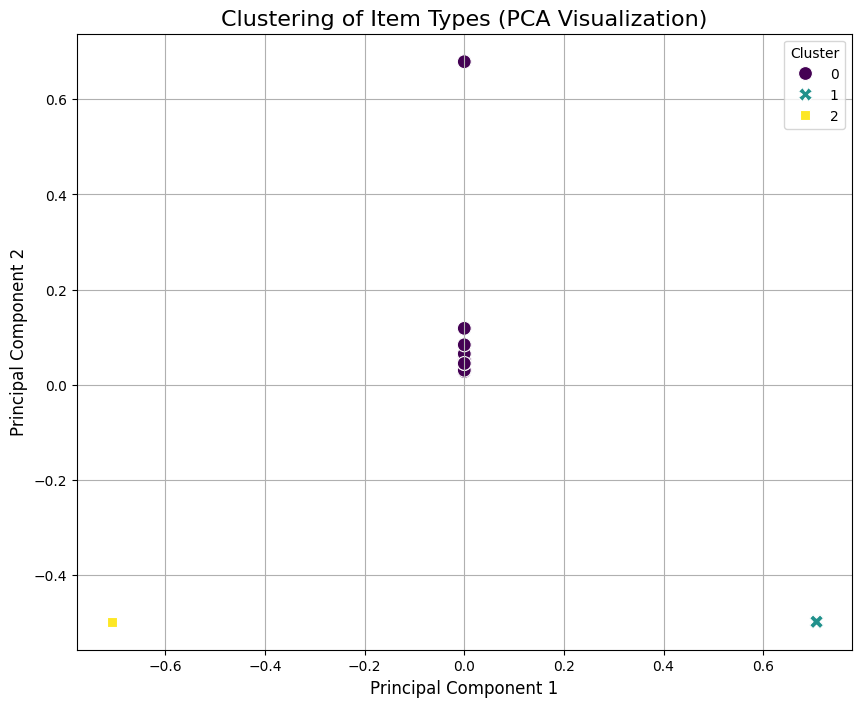

In [23]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

encoder = OneHotEncoder()
item_type_encoded = encoder.fit_transform(df[['Item Type']]).toarray()
item_type_df = pd.DataFrame(item_type_encoded, columns=encoder.get_feature_names_out(['Item Type']))

kmeans = KMeans(n_clusters=3, random_state=42) 
clusters = kmeans.fit_predict(item_type_df)
df['Cluster'] = clusters
cluster_summary = df.groupby('Cluster')['Item Type'].value_counts()
print("Cluster Summary:")
print(cluster_summary)

pca = PCA(n_components=2)
item_type_pca = pca.fit_transform(item_type_encoded)
pca_df = pd.DataFrame(item_type_pca, columns=['PCA1', 'PCA2'])
pca_df['Cluster'] = clusters

plt.figure(figsize=(10, 8))
sns.scatterplot(data=pca_df,x='PCA1',y='PCA2',hue='Cluster',palette='viridis',style='Cluster',s=100)
plt.title('Clustering of Item Types (PCA Visualization)', fontsize=16)
plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)
plt.legend(title='Cluster', loc='best')
plt.grid(True)
plt.show()